## NJABULO NYEMBE

#### Dependencies

In [1]:
#pandas and visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# text cleaning and transformation
import nltk
import plotly.graph_objects as go
import re
import string
from collections import Counter
from nltk import bigrams
from nltk.corpus import stopwords, wordnet
from nltk import word_tokenize, sent_tokenize, FreqDist
from wordcloud import STOPWORDS
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk import word_tokenize, pos_tag, pos_tag_sents
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer 
from wordcloud import WordCloud
# training the model
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# Asssessing the model
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
#resampling module
from sklearn.utils import resample
#hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import preprocessor as p

In [2]:
#Read the data
df_train = pd.read_csv('train_set.csv')
df_test = pd.read_csv('test_set.csv')
df_sub = pd.read_csv('sample_submission.csv')
df_train.head()

lang_id                                               text
0     xho  umgaqo-siseko wenza amalungiselelo kumaziko ax...
1     xho  i-dha iya kuba nobulumko bokubeka umsebenzi na...
2     eng  the province of kwazulu-natal department of tr...
3     nso  o netefatša gore o ba file dilo ka moka tše le...
4     ven  khomishini ya ndinganyiso ya mbeu yo ewa maana...

In [37]:
df_test.head(10)

index                                               text
0      1  Mmasepala, fa maemo a a kgethegileng a letlele...
1      2  Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2      3         Tshivhumbeo tshi fana na ngano dza vhathu.
3      4  Kube inja nelikati betingevakala kutsi titsini...
4      5                      Winste op buitelandse valuta.
5      6  Ke feela dilense tše hlakilego, tša pono e tee...
6      7  <fn>(762010101403 AM) 1495 Final Gems Birthing...
7      8  Ntjhafatso ya konteraka ya mosebetsi: Etsa bon...
8      9  u-GEMS uhlinzeka ngezinzuzo zemithi yezifo ezi...
9     10           So, on occasion, are statistics misused.

## Data Cleaning 

In [38]:
df_train.isnull().sum()

lang_id    0
text       0
dtype: int64

In [39]:
df_test.isnull().sum()

index    0
text     0
dtype: int64

 No missing values so we can go ahead and remove some punctuations and special charaters incase there is any

In [40]:
# remove special characters using the regular expression library

#set up punctuations we want to be replaced
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])|(\%)|(\$)|(\>)|(\<)|(\{)|(\})")
REPLACE_WITH_SPACE = re.compile("(<br\s/><br\s/?)|(-)|(_)|(/)|(:).")

# custom function to clean the dataset (combining message_preprocessor and regular expression)
def clean_message(df):
  tempArr = []
  for line in df:
    
    # send to message_processor
    tmpL = p.clean(line)
    # remove puctuation
    tmpL = REPLACE_NO_SPACE.sub("", tmpL.lower()) # convert all messages to lower cases
    tmpL = REPLACE_WITH_SPACE.sub(" ", tmpL)
    tempArr.append(tmpL)
  return tempArr

train_messages = clean_message(df_all["text"])
train_messages = pd.DataFrame(train_messages)

# add the cleaned texts to the training data
df_train["text"] = train_messages

# viewing the data
df_train.head(10)

lang_id                                               text
0     xho  umgaqo siseko wenza amalungiselelo kumaziko ax...
1     xho  i dha iya kuba nobulumko bokubeka umsebenzi na...
2     eng  the province of kwazulu natal department of tr...
3     nso  o netefata gore o ba file dilo ka moka te le d...
4     ven  khomishini ya ndinganyiso ya mbeu yo ewa maana...
5     nso  dinyakiio te ta go dirwa gabedi ka ngwaga di t...
6     tsn  kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7     ven  mbadelo dze dza laelwa dzi do kwama mahatulele...
8     nso  maloko a dikhuduthamaga a ikarabela mongwe le ...
9     tsn  fa le dirisiwa lebone le tshwanetse go bontsha...

Cleaning our test dataset the same way 

In [41]:
test_messages = clean_message(df_test["text"])
test_messages = pd.DataFrame(test_messages)

# add the cleaned messagess to the testing data
df_test["text"] = test_messages

# compare the cleaned and uncleaned tweets
df_test.head(10)

index                                               text
0      1  mmasepala fa maemo a a kgethegileng a letlelel...
1      2  uzakwaziswa ngokufaneleko nakungafuneka eminye...
2      3          tshivhumbeo tshi fana na ngano dza vhathu
3      4  kube inja nelikati betingevakala kutsi titsini...
4      5                       winste op buitelandse valuta
5      6  ke feela dilense te hlakilego ta pono e tee go...
6      7  fn762010101403 am final gems birthing options ...
7      8  ntjhafatso ya konteraka ya mosebetsi etsa bonn...
8      9  u gems uhlinzeka ngezinzuzo zemithi yezifo ezi...
9     10              so on occasion are statistics misused

if you check above some numbers were not removed so we will do a second round cleaning

In [42]:
def text_cleaner(text):

    # change all words into lower case
    text = text.lower()

    # removing all punctuation and digits
    text = re.sub(r'[-]',' ',text)
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub('[0-9]+', '', text)

    text = re.sub("â|ã", " ", text)  # removes strange character    
    text = re.sub("\\s+", " ", text)  # fills white spaces
    text = text.lstrip()  # removes whitespaces before string
    text = text.rstrip()  # removes whitespaces after string 
    return text

In [43]:
df_train['text']=df_train['text'].apply(text_cleaner)
df_test['text']=df_test['text'].apply(text_cleaner)

### Let's see our data

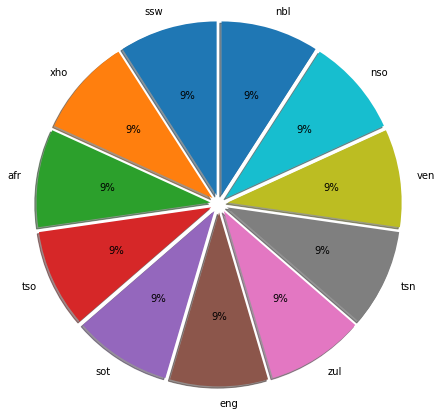

In [46]:
new=list(set(df_all.lang_id.values))

plt.pie(df_all['lang_id'].value_counts(),
            labels=new,
            autopct='%1.0f%%',
            shadow=True,
            startangle=90,
            explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1), radius = 2)

plt.show()

we are dealing with a balanced data 

# Model

we will only look at Multinomial Naïve Bayes Classifier

### Spliting the data

In [65]:
#Splitting features and target variables
X = df_train['text']#X is the features of the cleaned tweets
y = df_train['lang_id'] #Y is the target variable which is the train sentiment
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [66]:
#Call the TFidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(3,6),analyzer='char') 

#### Multinomial Naïve Bayes Classifier

In [67]:
nb = MultinomialNB()
clf_nb= Pipeline([('tfidf', tfidf), ('clf', nb)])
clf_nb.fit(X_train, y_train)
y_pred_nb = clf_nb.predict(X_test)
print('accuracy %s' % accuracy_score(y_pred_nb, y_test)) #Print the accuracy
print('f1_score %s' % metrics.f1_score(y_test,y_pred_nb,average='weighted')) #Print the f1 score
print(classification_report(y_test, y_pred_nb)) #Print out the classification

accuracy 1.0
f1_score 1.0
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       300
         eng       1.00      1.00      1.00       272
         nbl       1.00      1.00      1.00       312
         nso       1.00      1.00      1.00       277
         sot       1.00      1.00      1.00       299
         ssw       1.00      1.00      1.00       320
         tsn       1.00      1.00      1.00       295
         tso       1.00      1.00      1.00       299
         ven       1.00      1.00      1.00       306
         xho       1.00      1.00      1.00       308
         zul       1.00      1.00      1.00       312

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300



#### predictions

In [68]:
y_test_pred_NB= clf_nb.predict(df_test['text'])

prediction_NB = pd.DataFrame({'index':df_test['index'],
                          'lang_id':y_test_pred_NB})

prediction_NB.to_csv('classification_NB2.csv',index=False)
y_test_pred_NB

array(['tsn', 'nbl', 'ven', ..., 'sot', 'sot', 'nbl'], dtype='<U3')

Text(61.5, 0.5, 'Actual')

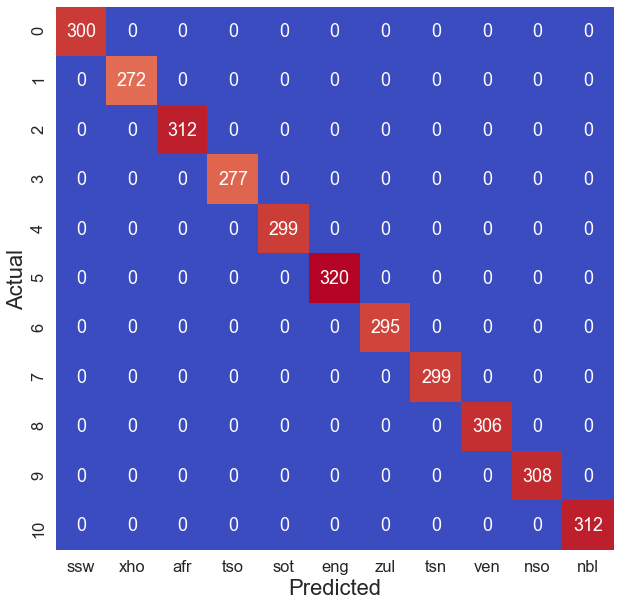

In [72]:
conf_matrix = confusion_matrix(y_test,y_pred_nb)
conf_matrix_df = pd.DataFrame(conf_matrix,columns=new)

#Plot confusion matrix heatmap
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix_df,cmap='coolwarm',annot=True,fmt='.5g',cbar=False)
plt.xlabel('Predicted',fontsize=22)
plt.ylabel('Actual',fontsize=22)